In [242]:
import pandas as pd
import numpy as np


def get_all_teams():
    with open('../data/teams.json', 'r') as f:
        return json.loads(f.read())


def read_game_log(year, advanced=False):
    
    data_frames = []
    for team in get_all_teams():
        if advanced:
            base_url = 'https://www.basketball-reference.com/teams/{team}/{year}/gamelog-advanced/'
        else:
            base_url = 'https://www.basketball-reference.com/teams/{team}/{year}/gamelog/'
  
        base_url = base_url.format(team=team, year=year)
        print("fetching url: ", base_url)
        
        table = pd.read_html(base_url, skiprows=0, header=1)[0]

        table = table[pd.to_numeric(table['G'], errors='coerce').notnull()]
#         assert len(table) == 82

#         indexes = []
#         for index, row in table.iterrows():
#             date = row['Date'].replace('-', '')
#             if row['Unnamed: 3'] == '@':
#                 indexes.append('{0}{1}'.format(date, row['Opp']))
#             else:
#                 indexes.append('{0}{1}'.format(date, team))

        keep_columns = [c for c in table.columns if 'Unnamed' not in c]

        table = table[keep_columns]
        table['Team'] = team

        table.columns = [c.replace('.1', '-opp') for c in table.columns]

        for c in table.columns:
            if c in set(['Date', 'Opp', 'W/L', 'Team']):
                continue    

            table[c] = pd.to_numeric(table[c], errors='downcast')
        
        table = table.rename(columns={'Tm': 'Pts Scored', 'Opp-opp': 'Pts Allowed'}).drop(columns=['Rk'])
        data_frames.append(table)
        
    return pd.concat(data_frames)

In [248]:
t = read_game_log(2019, advanced=True)

fetching url:  https://www.basketball-reference.com/teams/MIA/2019/gamelog-advanced/
fetching url:  https://www.basketball-reference.com/teams/CHI/2019/gamelog-advanced/
fetching url:  https://www.basketball-reference.com/teams/WAS/2019/gamelog-advanced/
fetching url:  https://www.basketball-reference.com/teams/OKC/2019/gamelog-advanced/
fetching url:  https://www.basketball-reference.com/teams/DEN/2019/gamelog-advanced/
fetching url:  https://www.basketball-reference.com/teams/PHI/2019/gamelog-advanced/
fetching url:  https://www.basketball-reference.com/teams/MIN/2019/gamelog-advanced/
fetching url:  https://www.basketball-reference.com/teams/BRK/2019/gamelog-advanced/
fetching url:  https://www.basketball-reference.com/teams/MIL/2019/gamelog-advanced/
fetching url:  https://www.basketball-reference.com/teams/LAL/2019/gamelog-advanced/
fetching url:  https://www.basketball-reference.com/teams/PHO/2019/gamelog-advanced/
fetching url:  https://www.basketball-reference.com/teams/ATL/201

In [261]:
cols = list(t.columns)
cols.insert(0, cols.pop(cols.index('Team')))
t = t.ix[:, cols]

/Users/jimmyzhang/.virtualenvs/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [265]:
t.to_csv('../data/advanced_game_logs.csv', index=False, float_format='%.2f')

In [266]:
!cat '../data/advanced_game_logs.csv'

Team,G,Date,Opp,W/L,Pts Scored,Pts Allowed,ORtg,DRtg,Pace,FTr,3PAr,TS%,TRB%,AST%,STL%,BLK%,eFG%,TOV%,ORB%,FT/FGA,eFG%-opp,TOV%-opp,DRB%,FT/FGA-opp
MIA,1,2018-10-17,ORL,L,101,104,97.60,100.50,103.50,0.23,0.34,0.47,50.50,42.10,3.90,7.20,0.44,13.00,27.50,0.17,0.45,10.00,73.10,0.20
MIA,2,2018-10-18,WAS,W,113,112,110.80,109.90,101.90,0.35,0.36,0.51,57.90,65.80,5.90,9.10,0.45,12.50,40.00,0.26,0.51,12.50,82.50,0.36
MIA,3,2018-10-20,CHO,L,112,113,112.60,113.60,99.50,0.30,0.38,0.56,55.10,51.20,4.00,21.60,0.52,12.90,30.00,0.21,0.53,9.60,75.50,0.16
MIA,4,2018-10-24,NYK,W,110,87,110.40,87.40,99.60,0.34,0.35,0.58,53.10,61.50,7.00,8.60,0.56,12.10,10.30,0.23,0.43,11.00,82.50,0.10
MIA,5,2018-10-27,POR,W,120,111,120.20,111.20,99.90,0.27,0.41,0.56,57.10,47.70,7.00,14.50,0.54,10.00,32.00,0.18,0.49,8.20,83.30,0.28
MIA,6,2018-10-29,SAC,L,113,123,103.80,113.00,108.90,0.37,0.42,0.53,53.10,52.60,9.20,12.70,0.48,14.40,26.00,0.26,0.56,10.00,81.30,0.15
MIA,7,2018-10-30,CHO,L,113,125,115.10,127.40,98.10,0.28,0.32

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt


def graph_all_striplots(df):
    for c in df.columns:
        if c not in ['Date', 'Opp', 'W/L', 'Team', 'Rk', 'G']:
            plt.figure()
            sns.stripplot(x="W/L", y=c, data=df, jitter=True)

In [225]:
t_2019 = read_game_log(2019, advanced=True)

fetching url:  https://www.basketball-reference.com/teams/MIA/2019/gamelog-advanced/
fetching url:  https://www.basketball-reference.com/teams/CHI/2019/gamelog-advanced/
fetching url:  https://www.basketball-reference.com/teams/WAS/2019/gamelog-advanced/
fetching url:  https://www.basketball-reference.com/teams/OKC/2019/gamelog-advanced/
fetching url:  https://www.basketball-reference.com/teams/DEN/2019/gamelog-advanced/
fetching url:  https://www.basketball-reference.com/teams/PHI/2019/gamelog-advanced/
fetching url:  https://www.basketball-reference.com/teams/MIN/2019/gamelog-advanced/
fetching url:  https://www.basketball-reference.com/teams/BRK/2019/gamelog-advanced/
fetching url:  https://www.basketball-reference.com/teams/MIL/2019/gamelog-advanced/
fetching url:  https://www.basketball-reference.com/teams/LAL/2019/gamelog-advanced/
fetching url:  https://www.basketball-reference.com/teams/PHO/2019/gamelog-advanced/
fetching url:  https://www.basketball-reference.com/teams/ATL/201

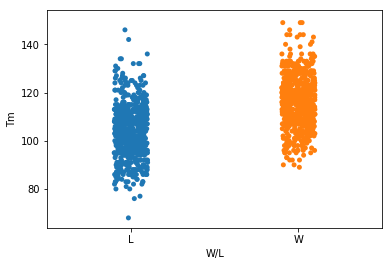

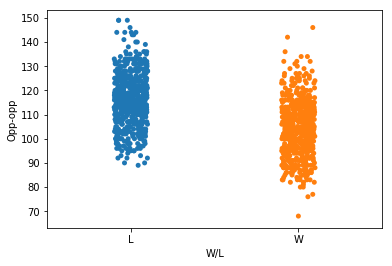

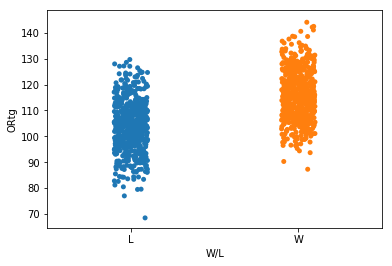

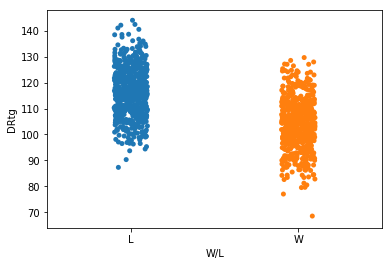

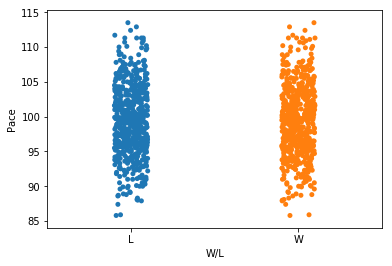

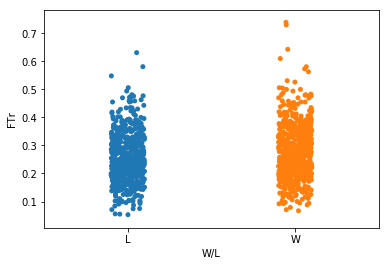

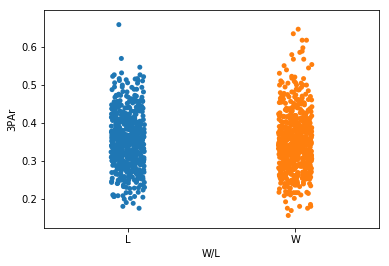

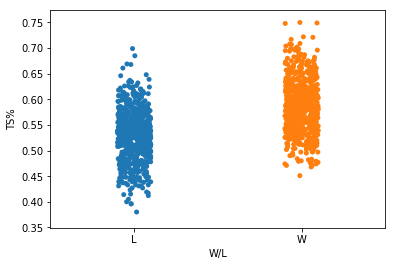

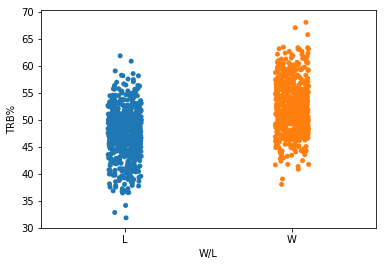

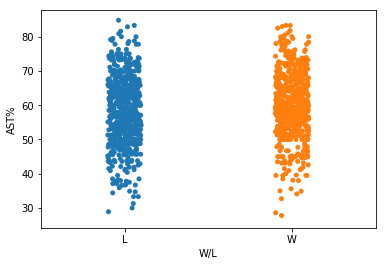

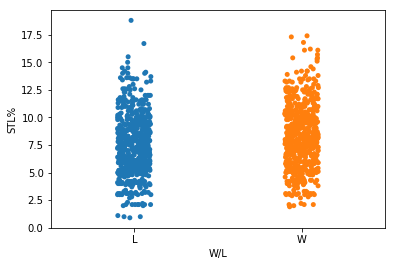

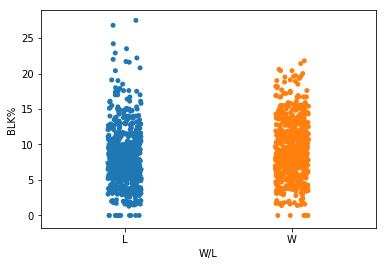

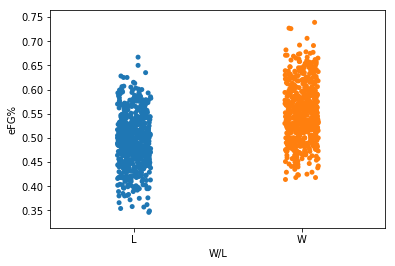

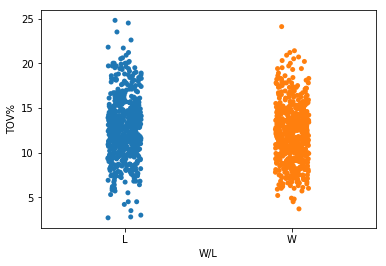

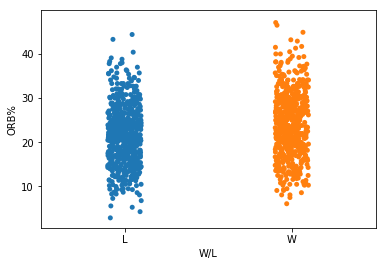

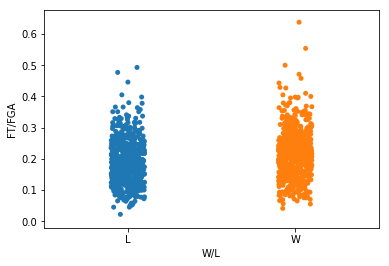

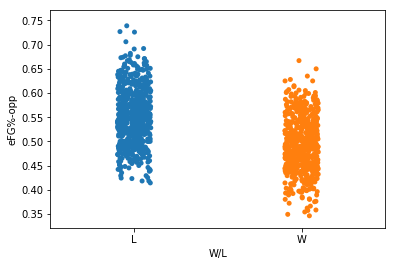

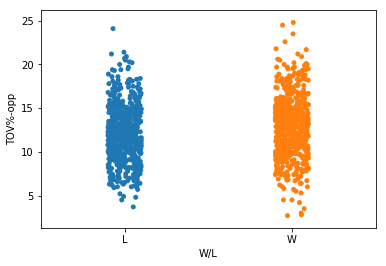

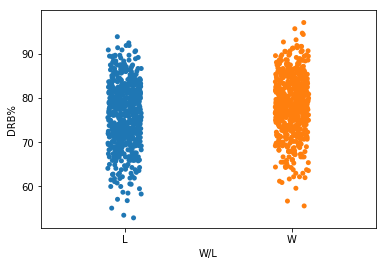

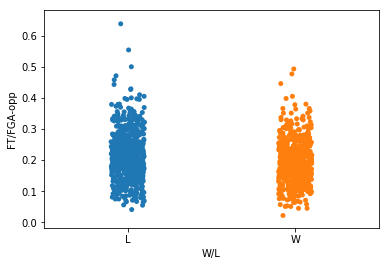

In [226]:
graph_all_striplots(t_2019)

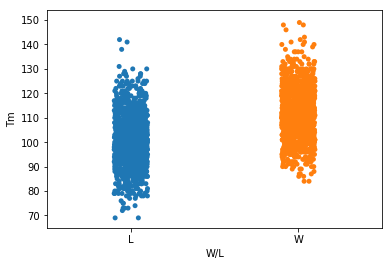

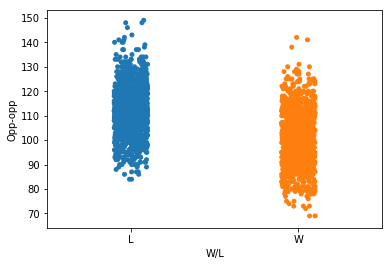

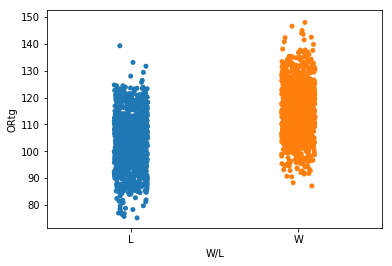

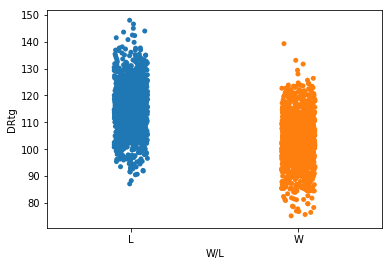

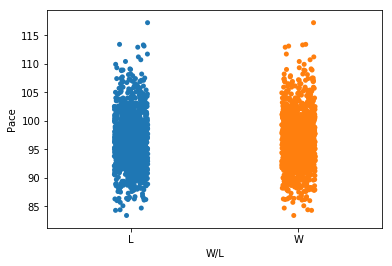

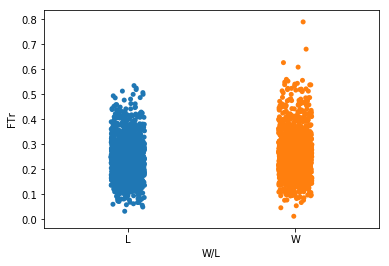

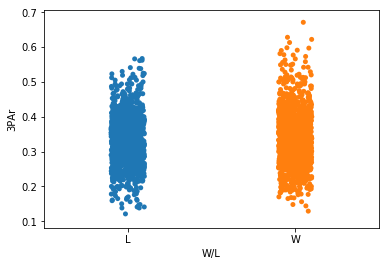

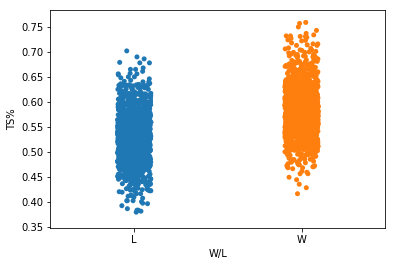

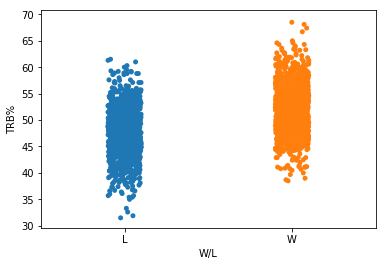

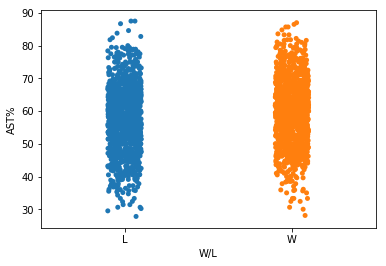

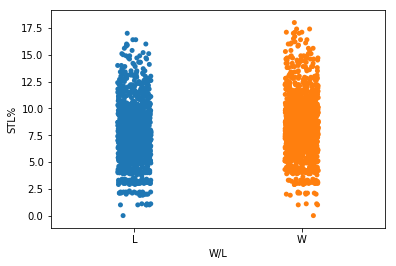

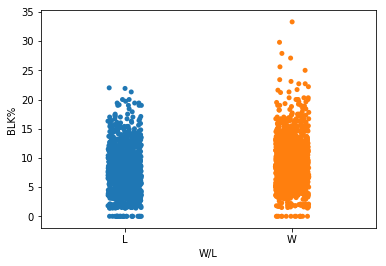

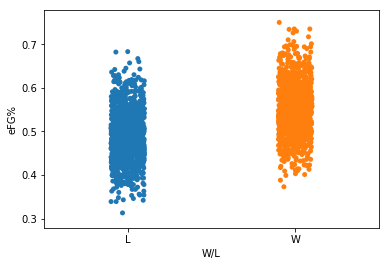

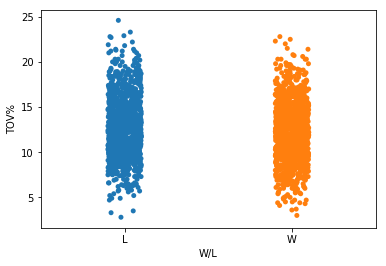

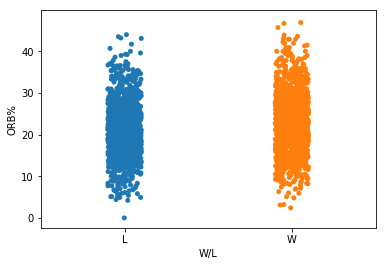

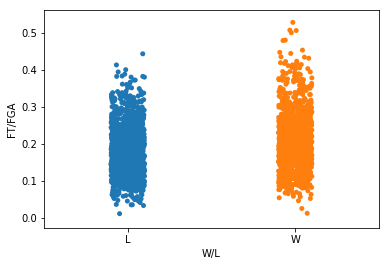

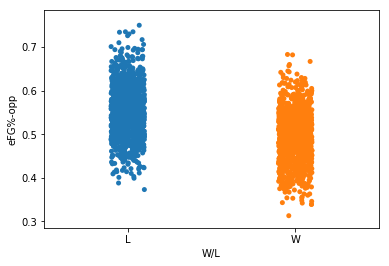

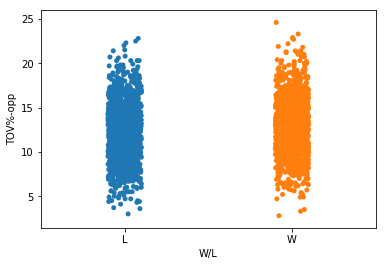

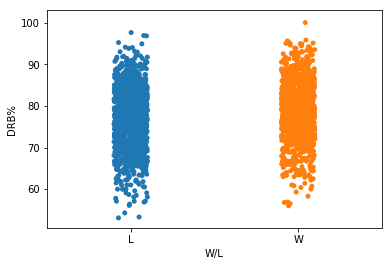

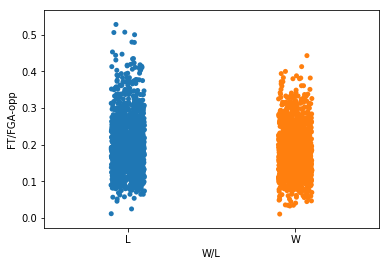

In [221]:
graph_all_striplots(t)

In [204]:
gl = read_game_log(2018, advanced=True)

fetching url:  https://www.basketball-reference.com/teams/MIL/2018/gamelog-advanced/
fetching url:  https://www.basketball-reference.com/teams/BOS/2018/gamelog-advanced/
fetching url:  https://www.basketball-reference.com/teams/CHO/2018/gamelog-advanced/
fetching url:  https://www.basketball-reference.com/teams/GSW/2018/gamelog-advanced/
fetching url:  https://www.basketball-reference.com/teams/HOU/2018/gamelog-advanced/


In [212]:
import json

with open('../data/teams.json', 'w') as f:
    json.dump(list(set(gl['Opp'])), f)
    
